In [4]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go

In [83]:
file_path = r'D:\Data_Science_WBS-coding_bootcamp\Bootcamp\unsupervised_ML\6.3.2_spotify_10_songs.csv'

# Read the CSV file into a DataFrame
df_song10 = pd.read_csv(file_path)

In [89]:
df_song10.columns = df_song10.columns.str.strip()
songs_df_clean = df_song10.set_index(["song_name", "artist"])
song10_df_clean_numeric = songs_df_clean.drop(["id", "html"], axis=1)

In [84]:
# 2. initialize the model
random_seed = 42
my_kmeans = KMeans(n_clusters = 4, 
                   random_state = random_seed)

In [90]:
# 3. fit the model to the data
my_kmeans.fit(song10_df_clean_numeric)

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=42)

In [91]:
cluster10 = my_kmeans.labels_
cluster10

array([0, 0, 2, 0, 2, 0, 3, 3, 1, 0])

In [92]:
# 5. attach the cluster output to our original DataFrame
song10_df_clean_numeric["cluster10"] = cluster10

song10_df_clean_numeric.sort_values(by="cluster10")

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster10
song_name,artist,,,,,,,,,,,,,,
My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,0
The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,0
The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,0
Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,0
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,0
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,1
Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,2
"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,2
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,3


In [98]:
song10_df_clean_numeric.groupby(by="cluster10").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster10,,,,,,,,,,,,,
0,0.7122,0.49782,4.4,-11.8276,0.6,0.04922,0.48912,0.190272,0.14168,0.5988,112.7008,303602.2,4.0
1,0.1840,0.00833,3.0,-33.5030,1.0,0.05190,0.98900,0.596000,0.10400,0.2110,61.5410,109800.0,3.0
2,0.5530,0.56700,2.0,-12.3850,1.0,0.11630,0.45165,0.001220,0.25200,0.5515,151.0545,207333.5,4.0
3,0.7425,0.78800,2.5,-11.4410,1.0,0.07285,0.00431,0.884000,0.11100,0.1289,130.0030,416230.0,4.0


In [93]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(song10_df_clean_numeric)

In [94]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   random_state = 42)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [95]:
# Attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters

scaled_features_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster10,cluster
song_name,artist,,,,,,,,,,,,,,,
My Band,D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0,0.000000,1
The Real Slim Shady,Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0,0.000000,1
Águas De Março,Antônio Carlos Jobim,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0,0.666667,3
The Girl From Ipanema,Stan Getz,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0,0.000000,3
"Paint It, Black",The Rolling Stones,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0,0.666667,1
Sultans Of Swing,Dire Straits,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0,0.000000,1
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0,1.000000,2
In Silence,Amelie Lens,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0,1.000000,2
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0,0.333333,0


In [96]:
scaled_features_df.groupby(by="cluster").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster10
cluster,,,,,,,,,,,,,,
0,0.132680,0.021869,0.285714,0.146165,1.0,0.123056,0.999493,0.826396,0.177036,0.093205,0.000242,0.241133,0.5,0.166667
1,0.738889,0.911678,0.285714,0.888903,0.5,0.321363,0.158417,0.010718,0.501131,0.834424,0.734094,0.527989,1.0,0.166667
2,0.730065,0.927439,0.214286,0.732470,1.0,0.385636,0.001186,0.968237,0.185520,0.079316,0.704847,0.931625,1.0,1.000000
3,0.598039,0.274983,0.642857,0.576245,1.0,0.537969,0.868776,0.000909,0.168552,0.435836,0.770332,0.472436,1.0,0.333333


In [99]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Create an instance of RobustScaler
robust_scaler = RobustScaler()

# Fit the scaler to the data
robust_scaler.fit(song10_df_clean_numeric)

# Transform your data
scaled_data = robust_scaler.transform(song10_df_clean_numeric)

# scaled_data is now a NumPy array containing the scaled data
# You can convert it back to a DataFrame if needed
scaled_df = pd.DataFrame(scaled_data, columns=song10_df_clean_numeric.columns)

In [101]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   random_state = 42)

# Fit the model to the data
my_kmeans.fit(scaled_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [103]:
# Attach the cluster output to our original DataFrame
scaled_df["cluster"] = clusters

scaled_df

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster10,cluster
song_name,artist,,,,,,,,,,,,,,,
My Band,D12,0.688421,0.252893,-0.615385,1.149132,-1.0,0.541966,0.262798,-0.024496,0.50,0.775276,-0.268775,0.063605,0.0,-0.25,0
The Real Slim Shady,Eminem,1.101053,-0.057851,0.615385,1.026347,-1.0,0.050839,-0.300443,-0.024498,-6.56,0.614279,-0.750732,-0.063605,0.0,-0.25,2
Águas De Março,Antônio Carlos Jobim,-0.191579,-0.590083,0.000000,-0.579272,0.0,1.639329,0.693554,-0.024498,-0.60,0.098706,0.458481,-0.690362,0.0,0.75,0
The Girl From Ipanema,Stan Getz,-0.195789,-0.919008,1.538462,-0.762808,0.0,-0.298321,0.709240,-0.022420,-0.60,-0.098706,0.020338,0.231328,0.0,-0.25,0
"Paint It, Black",The Rolling Stones,-0.941053,0.163636,-0.615385,0.310029,0.0,0.729976,-0.277397,-0.021444,28.80,0.330618,0.933074,-0.778815,0.0,0.75,3
Sultans Of Swing,Dire Straits,0.191579,0.161983,0.615385,0.202218,0.0,-0.457554,-0.262798,0.021444,21.90,0.942022,0.606269,0.498765,0.0,-0.25,1
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.258947,0.057851,0.307692,0.082142,0.0,1.025420,-0.333094,1.060834,0.00,-0.727743,0.103585,1.285231,0.0,1.25,0
In Silence,Amelie Lens,0.204211,0.246281,-0.615385,-0.082142,0.0,-0.323261,-0.330271,1.103396,0.00,-0.462865,-0.020338,0.892592,0.0,1.25,0
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,-2.120000,-1.136645,0.000000,-3.146208,0.0,-0.050839,0.856445,0.721590,-0.70,-0.437949,-2.085764,-1.585978,-1.0,0.25,0


In [104]:
scaled_df.groupby(by="cluster").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster10
cluster,,,,,,,,,,,,,,
0,-0.374436,-0.452083,0.087912,-0.747101,-0.142857,0.312299,0.388046,0.561832,-0.185714,-0.222794,-0.554242,-0.000696,-0.142857,0.392857
1,0.191579,0.161983,0.615385,0.202218,0.000000,-0.457554,-0.262798,0.021444,21.900000,0.942022,0.606269,0.498765,0.000000,-0.250000
2,1.101053,-0.057851,0.615385,1.026347,-1.000000,0.050839,-0.300443,-0.024498,-6.560000,0.614279,-0.750732,-0.063605,0.000000,-0.250000
3,-0.941053,0.163636,-0.615385,0.310029,0.000000,0.729976,-0.277397,-0.021444,28.800000,0.330618,0.933074,-0.778815,0.000000,0.750000


In [105]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(song10_df_clean_numeric)

# Transform your data
song10_df_clean_numeric_scaled = scaler.transform(song10_df_clean_numeric)

In [106]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   random_state = 42)

# Fit the model to the data
my_kmeans.fit(song10_df_clean_numeric_scaled)

# Obtain the cluster output
clusters = my_kmeans.labels_

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [107]:
# Attach the cluster output to our original DataFrame
song10_df_clean_numeric_scaled["cluster"] = clusters

song10_df_clean_numeric_scaled

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster10,cluster
song_name,artist,,,,,,,,,,,,,,,
My Band,D12,1.000384,0.992687,-1.138990,1.217434,-2.0,0.435538,0.146786,-0.816077,-0.349827,1.270021,0.040646,0.123210,0.333333,-0.901155,0
The Real Slim Shady,Eminem,1.451340,0.424153,0.759326,1.118976,-2.0,-0.299450,-0.952202,-0.816082,-1.002517,0.994657,-0.445036,-0.035980,0.333333,-0.901155,0
Águas De Março,Antônio Carlos Jobim,0.038653,-0.549612,-0.189832,-0.168522,0.5,2.077778,0.987271,-0.816082,-0.451521,0.112834,0.773521,-0.820299,0.333333,0.737309,1
The Girl From Ipanema,Stan Getz,0.034052,-1.151411,2.183063,-0.315694,0.5,-0.821981,1.017877,-0.811999,-0.451521,-0.224816,0.331992,0.333097,0.333333,-0.901155,1
"Paint It, Black",The Rolling Stones,-0.780429,0.829385,-1.138990,0.544582,0.5,0.716901,-0.907235,-0.810080,2.266479,0.509490,1.251782,-0.930989,0.333333,0.737309,1
Sultans Of Swing,Dire Straits,0.457397,0.826361,0.759326,0.458132,0.5,-1.060278,-0.878748,-0.725811,1.628581,1.555220,0.922451,0.667766,0.333333,-0.901155,0
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.531023,0.635842,0.284747,0.361846,0.5,1.159042,-1.015909,1.316484,-0.396051,-1.300705,0.415883,1.651944,0.333333,1.556541,3
In Silence,Amelie Lens,0.471202,0.980591,-1.138990,0.230112,0.5,-0.859305,-1.010400,1.400114,-0.396051,-0.847664,0.291002,1.160598,0.333333,1.556541,3
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,-2.068872,-1.549596,-0.189832,-2.226872,0.5,-0.451616,1.305102,0.649903,-0.460766,-0.805048,-1.790384,-1.941067,-3.000000,-0.081923,2


In [108]:
scaled_df.groupby(by="cluster").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster10
cluster,,,,,,,,,,,,,,
0,-0.374436,-0.452083,0.087912,-0.747101,-0.142857,0.312299,0.388046,0.561832,-0.185714,-0.222794,-0.554242,-0.000696,-0.142857,0.392857
1,0.191579,0.161983,0.615385,0.202218,0.000000,-0.457554,-0.262798,0.021444,21.900000,0.942022,0.606269,0.498765,0.000000,-0.250000
2,1.101053,-0.057851,0.615385,1.026347,-1.000000,0.050839,-0.300443,-0.024498,-6.560000,0.614279,-0.750732,-0.063605,0.000000,-0.250000
3,-0.941053,0.163636,-0.615385,0.310029,0.000000,0.729976,-0.277397,-0.021444,28.800000,0.330618,0.933074,-0.778815,0.000000,0.750000


spotify_5000_songs

In [213]:
file_path = r'D:\Data_Science_WBS-coding_bootcamp\Bootcamp\unsupervised_ML\6.3.3_spotify_5000_songs.csv'

# Read the CSV file into a DataFrame
df_songs = pd.read_csv(file_path)


In [45]:
df_songs.head(2)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7
1,1,Saudade De Bahia,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq


In [214]:
df_songs.columns = df_songs.columns.str.strip()

In [31]:
# to_drop = ['name', 'artist', 'id', 'html']
# df_songs = df_songs.drop(columns=to_drop)

In [215]:
pd.set_option('display.max_colwidth', 1000)

In [218]:
df_songs.columns = df_songs.columns.str.strip()
songs_df_clean = df_songs.set_index(["name", "artist", "id"])
songs_df_clean_numeric = songs_df_clean.drop(["time_signature", "html", "type", "Unnamed: 0"], axis=1)

Here I want to drop some features and find out if it lead to optimal clustering outcome

In [217]:
songs_df_clean = df_songs.set_index(["name", "artist", "id"])
songs_df_clean_numeric4 = songs_df_clean.drop(["time_signature", "key", "loudness", "mode", "speechiness", "instrumentalness", "liveness", "tempo", "duration_ms",  "html", "type", "Unnamed: 0"], axis=1)

In [219]:
songs_df_clean_numeric4.head(2)

,,,danceability,energy,acousticness,valence
name,artist,id,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,0.658,0.259,0.694,0.306
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,0.742,0.399,0.217,0.693


In [220]:
songs_df_clean_numeric.head(2)

,,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
name,artist,id,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867


In [221]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(songs_df_clean_numeric)

In [223]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(songs_df_clean_numeric4)

In [224]:
from sklearn import set_config
set_config(transform_output = "pandas") 


In [225]:

#and then again, maybe in a stripped version:

my_min_max = MinMaxScaler()
# Use the scaler to scale the data
scaled_songs_df_cl = my_min_max.fit_transform(songs_df_clean_numeric)

In [226]:
#and then again, maybe in a stripped version:

my_min_max = MinMaxScaler()
# Use the scaler to scale the data
scaled_songs_df_cl4 = my_min_max.fit_transform(songs_df_clean_numeric4)

In [227]:
# 5. reconvert the transformed data back to a DataFrame
pd.DataFrame(scaled_songs_df_cl ,
index=songs_df_clean_numeric4.index,
columns=songs_df_clean_numeric4.columns)

,,,danceability,energy,acousticness,valence
name,artist,id,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.696787,0.310660
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.217871,0.703553
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.454819,0.918782
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.882530,0.531980
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.919679,0.408122
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.920683,0.066497
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.858434,0.036041
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.954819,0.034924


In [228]:
# 5. reconvert the transformed data back to a DataFrame
pd.DataFrame(scaled_songs_df_cl ,
index=songs_df_clean_numeric.index,
columns=songs_df_clean_numeric.columns)

,,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
name,artist,id,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302


In [229]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [230]:
my_min_max = MinMaxScaler()
# Use the scaler to scale the data
scaled_songs_df_cl = my_min_max.fit_transform(scaled_songs_df_cl)

In [231]:
my_min_max = MinMaxScaler()
# Use the scaler to scale the data
scaled_songs_df_cl4 = my_min_max.fit_transform(scaled_songs_df_cl4)

In [232]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 25)

In [233]:
# 3. fit the model to the data
my_kmeans.fit(scaled_songs_df_cl ) # pass your scaled data here

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=25)

In [234]:

# 4. obtain the cluster output
clusters = my_kmeans.labels_

In [235]:
scaled_songs_df_cl["cluster"] = clusters

In [236]:
scaled_songs_df_cl4["cluster"] = clusters

In [237]:
scaled_songs_df_cl4[["cluster"]].sort_values(by='cluster')

,,,cluster
name,artist,id,
Taste of Insanity,Master,50irasso23TLY0geiasGb4,0
Blinded By Fear,At The Gates,2pj2VXKSBRTmV8nuiaCKd2,0
Ramses Bringer of War,Nile,1M0tEMb3d4eJNnkSmPxIjn,0
Mantra - Axwell Cut,Michael Feiner,2UOeRG6mTa06loIxiOin4S,0
Out of the Womb,Regurgitation,1eTQvMVb9n1f3baypdxR0O,0
...,...,...,...
Over Everything,Courtney Barnett,2QD3d1Jmro7nBLDoABJ5AF,24
Firestone,Kygo,1I8tHoNBFTuoJAlh4hfVVE,24
My House,Flo Rida,6Knv6wdA0luoMUuuoYi2i1,24


In [158]:
cluster_0_12 = scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == 0]
cluster_0_12.sample(10)

,,,danceability,energy,acousticness,valence,cluster
name,artist,id,,,,,
Annihilation of the Wicked,Nile,4SXbZbMoKTaBAFcsbSkdc4,0.214064,0.837,0.000007,0.090051,0
A Brutal Sight of War,Disfear,1R0nshtPiN0ed30c0CKAWu,0.251293,0.987,0.000002,0.038985,0
When Death Joins Us - Demo 1990,Sentenced,055kZ1zeqA3V2j11sGNevW,0.173733,0.943,0.000706,0.184772,0
Malleus Maleficarum / Anthropomorphia,Pestilence,2y7fEQqVcW1KVQ9c4SKsMv,0.283351,0.930,0.000001,0.294416,0
Christening the Afterbirth,Incantation,3r0j1CfJcoVCrYAFNjYA2U,0.204757,0.843,0.014558,0.316751,0
Ahnma,Beginner,1sr9lbDDGIxmFK7wUdA1Z8,0.533609,0.763,0.258032,0.383756,0
Repent to Die,Deicide,0XVdEAfk3P3kSNu6fyYOdV,0.352637,0.922,0.000003,0.519797,0
Twist The Knife (Slowly),Napalm Death,7F7CERqmywiOol1MZ2LLCU,0.237849,0.961,0.000005,0.227411,0
The Way of All Flesh,Morpheus Descends,6tvh5fy64d8QN1Ws14YXdp,0.140641,0.939,0.001135,0.135025,0


In [151]:
cluster_0 = scaled_songs_df_cl4.loc[scaled_songs_df_cl4["cluster"] == 0]
cluster_0.sample(10)

,,,danceability,energy,acousticness,valence,cluster
name,artist,id,,,,,
Never Tear Us Apart,INXS,1GjbTNFImFrjFsNdleDe78,0.686660,0.613,0.003102,0.195939,0
Phantasm,Possessed,45XVaJEPRkTe0SlPgr73qn,0.256463,0.930,0.039257,0.465990,0
Regurgitated Guts,Death,4IUL1VgywdoHTRC9L1fqRu,0.199586,0.926,0.000000,0.328934,0
Lost,Sander van Doorn,5WeL7ruThFERubIlDqWuVg,0.405377,0.912,0.004127,0.322843,0
Teenage Crime - Radio Edit,Adrian Lux,7cCRHUmSOHO8XcRuRy0vug,0.669080,0.843,0.019277,0.332995,0
Can't Feel My Face - Martin Garrix Remix,The Weeknd,22SXyL6pUjwIvGWvgGjLov,0.628749,0.722,0.007942,0.122843,0
Inevitale Demise,Necrosanct,1QaIKXrO7f8plDVUFHRA8J,0.184074,0.987,0.000017,0.116751,0
Sun Is Shining,Axwell /\ Ingrosso,5kBHjpK4YGXVnOMXDUDjgX,0.293692,0.774,0.086647,0.367513,0
Condemned to Nothingness,Decrepit Birth,4FxfFHRprO2yGHBbiFPOHQ,0.356774,0.974,0.000005,0.223350,0


In [153]:
cluster_1 = scaled_songs_df_cl4.loc[scaled_songs_df_cl4["cluster"] == 1]
cluster_1.sample(10)

,,,danceability,energy,acousticness,valence,cluster
name,artist,id,,,,,
Disfarça e Chora,Djavan,1tX11VR5wSRhBgcrTUoHY7,0.772492,0.185,0.908635,0.596954,1
"Water Music, Suite No. 2, HWV 349: Water Music, Suite No. 2, HWV 349: XII. [Alla Hornpipe]",George Frideric Handel,6x1xxlk6Dw1IdzvrzsL7B3,0.540848,0.244,0.928715,0.701523,1
Canto Negro,Kou Keri Kou,0EN1JterRnUpn7WAavQHEZ,0.427094,0.572,0.578313,0.982741,1
Firestone,Kygo,1I8tHoNBFTuoJAlh4hfVVE,0.728025,0.634,0.394578,0.417259,1
Your Cheatin' Heart,Hank Williams,13Oi7vfd9mrujcEmGAYAPe,0.694933,0.243,0.777108,0.699492,1
Blue Moon,Billie Holiday,1pZn8AX1WulW8IO338hE5D,0.660807,0.269,0.985944,0.547208,1
Surfin' U.S.A. - Remastered 2001,The Beach Boys,0wz1LjDb9ZNEYwOmDJ3Q4b,0.568769,0.854,0.663655,0.979695,1
Don't Be Cruel,Elvis Presley,01u6AEzGbGbQyYVdxajxqk,0.720786,0.550,0.859438,0.856853,1
My Guy - Single Version,Mary Wells,7arXVtGNJPa7aOHiKOeUsl,0.713547,0.543,0.690763,0.941117,1


In [154]:
cluster_2 = scaled_songs_df_cl4.loc[scaled_songs_df_cl4["cluster"] == 2]
cluster_2.sample(10)

,,,danceability,energy,acousticness,valence,cluster
name,artist,id,,,,,
DJ Got Us Fallin' In Love,Usher,5tXyNhNcsnn7HbcABntOSf,0.688728,0.878,0.030120,0.679188,2
What Lovers Do (feat. SZA),Maroon 5,2j5hsQvApottzvTn4pFJWF,0.826267,0.597,0.079116,0.425381,2
Lass mich nie mehr los - Studio Version,Sportfreunde Stiller,6xhI2HskPudsR3Tp6xaQJN,0.663909,0.638,0.187751,0.596954,2
Whistle,Flo Rida,0ltBH1JNzSvQJPjJpvTu9B,0.779731,0.933,0.019980,0.761421,2
Daga Adicta,Luigi 21 Plus,1BvoLDKmotg5dqfVW8y8KR,0.835574,0.903,0.144578,0.897462,2
Báilame - Remix,Nacho,4l3xGFwoTinvYxsePytOOf,0.668046,0.865,0.270080,0.773604,2
Cheap Thrills,Sia,7BPw9h8vCIX94N0rjFU12S,0.649431,0.698,0.047390,0.743147,2
The Power Of Love,Huey Lewis & The News,2olVm1lHicpveMAo4AUDRB,0.794209,0.829,0.096787,0.976650,2
Eat Sleep Rave Repeat - Calvin Harris Remix,Fatboy Slim,70oPTrUDduGe5C6R7e9asA,0.773526,0.935,0.426707,0.586802,2


In [145]:

# Define a function to sample 10 names from each group
def sample_names(group):
    # Get the names from the Index object and convert them to a list
    names = group.index.get_level_values('name').tolist()
    # Sample 10 names from the list
    sampled_names = pd.Series(names).sample(n=min(10, len(names)), random_state=42)
    return sampled_names

# Group the DataFrame by the 'cluster' column and apply the sampling function
sampled_names_df = scaled_songs_df_cl4.groupby('cluster').apply(sample_names)

# Reset the index to flatten the DataFrame
sampled_names_df = sampled_names_df.reset_index(level=0, drop=True)
# Rename the column to 'name'
sampled_names_df.columns = ['cluster', 'name']

# Display the sampled names DataFrame
print(sampled_names_df)


599     Fucked With A Knife                                                                                                                                                              
1348    Carnage in the Temple of the Damned                                                                                                                                              
115     If You Leave Me Now                                                                                                                                                              
135     Angels                                                                                                                                                                           
339     Without The Sun - Extended Club Mix                                                                                                                                              
694       No Guts, No Glory                                           

In [ ]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

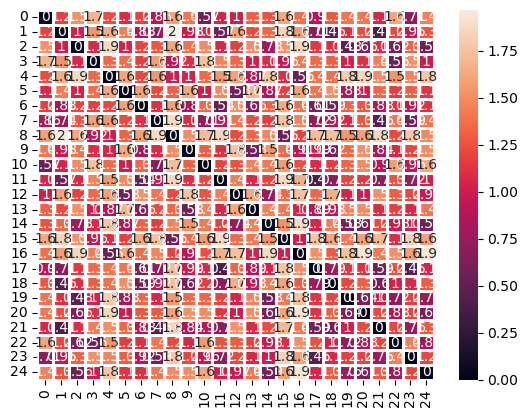

In [238]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

In [239]:
# Drop rows with non-numeric values
songs_df_clean_numeric = songs_df_clean_numeric.apply(pd.to_numeric, errors='coerce').dropna()

# Initialize the transformer
my_min_max = MinMaxScaler(feature_range=(0, 1))

# Fit the transformer to the data
my_min_max.fit(songs_df_clean_numeric)

MinMaxScaler()

In [121]:
# Drop rows with non-numeric values
songs_df_clean_numeric4 = songs_df_clean_numeric4.apply(pd.to_numeric, errors='coerce').dropna()

# Initialize the transformer
my_min_max = MinMaxScaler(feature_range=(0, 1))

# Fit the transformer to the data
my_min_max.fit(songs_df_clean_numeric4)

MinMaxScaler()

In [122]:
scaled_songs_df_cl4 .groupby(by="cluster").mean()

,danceability,energy,acousticness,valence
cluster,,,,
0,0.356267,0.871945,0.024588,0.238049
1,0.624306,0.490680,0.636084,0.616494
2,0.717475,0.743328,0.118056,0.690862
3,0.344234,0.139756,0.926947,0.171764


In [62]:
scaled_songs_df_cl .groupby(by="cluster").mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,,,
0,0.647276,0.681535,0.438831,0.860131,1.000000,0.085968,0.246499,0.020025,0.189042,0.612616,0.565442,0.050422
1,0.589172,0.746303,0.552810,0.864025,0.000000,0.102793,0.165664,0.180707,0.197779,0.494405,0.565639,0.054566
2,0.294030,0.908541,0.439376,0.850606,1.000000,0.118577,0.011154,0.596998,0.204588,0.235840,0.568011,0.058905
3,0.354116,0.142772,0.466437,0.643322,0.669927,0.049440,0.932072,0.657066,0.148104,0.191994,0.494294,0.074929


In [ ]:
# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(scaled_songs_df_cl['cluster'].unique()):
  cluster_songs = go.Scatterpolar(
    r=[scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'danceability'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'energy'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'key'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'loudness'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'mode'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'speechiness'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'acousticness'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'instrumentalness'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'liveness'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'valence'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'tempo'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'duration_ms'].mean(),
      scaled_songs_df_cl.loc[scaled_songs_df_cl["cluster"] == cluster, 'time_signature'].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(scaled_songs_df_cl)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of songs by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

In [242]:
import Clustering_functions as cf

In [243]:

cf.plot_radar_chart_clusters(scaled_songs_df_cl,"MinMaxScaler",25,42)

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [244]:
cf.plot_radar_chart_clusters(scaled_songs_df_cl4,"MinMaxScaler",25,42)

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [130]:
# Create an empty DataFrame to store the sampled songs
sampled_songs_df = pd.DataFrame()

# Assuming scaled_songs_df_cl4 contains the cluster labels for each song

# Iterate over each unique cluster label
for cluster_label in scaled_songs_df_cl4['cluster'].unique():
    # Filter songs belonging to the current cluster
    cluster_songs = songs_df_clean_numeric4[scaled_songs_df_cl4['cluster'] == cluster_label]
    
    # Sample 10 songs from the current cluster
    sampled_cluster_songs = cluster_songs.sample(n=10, random_state=42)
    
    # Concatenate sampled songs to the DataFrame
    sampled_songs_df = pd.concat([sampled_songs_df, sampled_cluster_songs])

# Reset the index of the DataFrame
sampled_songs_df.reset_index(drop=True, inplace=True)

# Display the sampled songs DataFrame
print(sampled_songs_df)

    danceability   energy  acousticness  valence
0          0.810  0.53800      0.528000   0.8280
1          0.579  0.34200      0.879000   0.7740
2          0.534  0.32700      0.611000   0.3800
3          0.503  0.44700      0.662000   0.6810
4          0.672  0.46400      0.430000   0.2710
5          0.853  0.35300      0.416000   0.1410
6          0.400  0.56400      0.693000   0.4830
7          0.785  0.36500      0.801000   0.9130
8          0.377  0.62600      0.832000   0.6780
9          0.617  0.51700      0.627000   0.5900
10         0.462  0.84700      0.028900   0.6600
11         0.702  0.86400      0.108000   0.7880
12         0.744  0.50200      0.183000   0.6600
13         0.733  0.79400      0.061400   0.9310
14         0.778  0.77200      0.022900   0.7100
15         0.883  0.57700      0.139000   0.9450
16         0.402  0.40900      0.128000   0.4890
17         0.626  0.56500      0.124000   0.9240
18         0.815  0.84000      0.183000   0.5870
19         0.820  0.

In [131]:
# Create an empty list to store DataFrames of sampled songs for each cluster
sampled_songs_per_cluster = []

# Assuming scaled_songs_df_cl4 contains the cluster labels for each song

# Iterate over each unique cluster label
for cluster_label in scaled_songs_df_cl4['cluster'].unique():
    # Filter songs belonging to the current cluster
    cluster_songs = songs_df_clean_numeric4[scaled_songs_df_cl4['cluster'] == cluster_label]
    
    # Sample 10 songs from the current cluster
    sampled_cluster_songs = cluster_songs.sample(n=10, random_state=42)
    
    # Append the DataFrame of sampled songs to the list
    sampled_songs_per_cluster.append(sampled_cluster_songs)

# Display the sampled songs for each cluster
for i, sampled_cluster_df in enumerate(sampled_songs_per_cluster):
    print(f"Cluster {i+1}:")
    print(sampled_cluster_df)
    print()

Cluster 1:
                                                                                                                                                                                                                                                            danceability  \
name                                                                                                                                                                              artist                                           id                                      
Because Of You                                                                                                                                                                    Ne-Yo                                            6CFPFnS9EcLs2I0nWqtWci          0.810   
Coisa Feita                                                                                                                                                                       Toots T

In [127]:
from sklearn.metrics import silhouette_score

In [128]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(songs_df_clean_numeric)

In [126]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_features_df4 = my_min_max.fit_transform(songs_df_clean_numeric4)

In [133]:
# Decide on a random_state to use
seed = 42

# Set the maximum number of clusters to try
max_k = 25

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters=i,
                      n_init="auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(scaled_features_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

c:\Users\sonia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



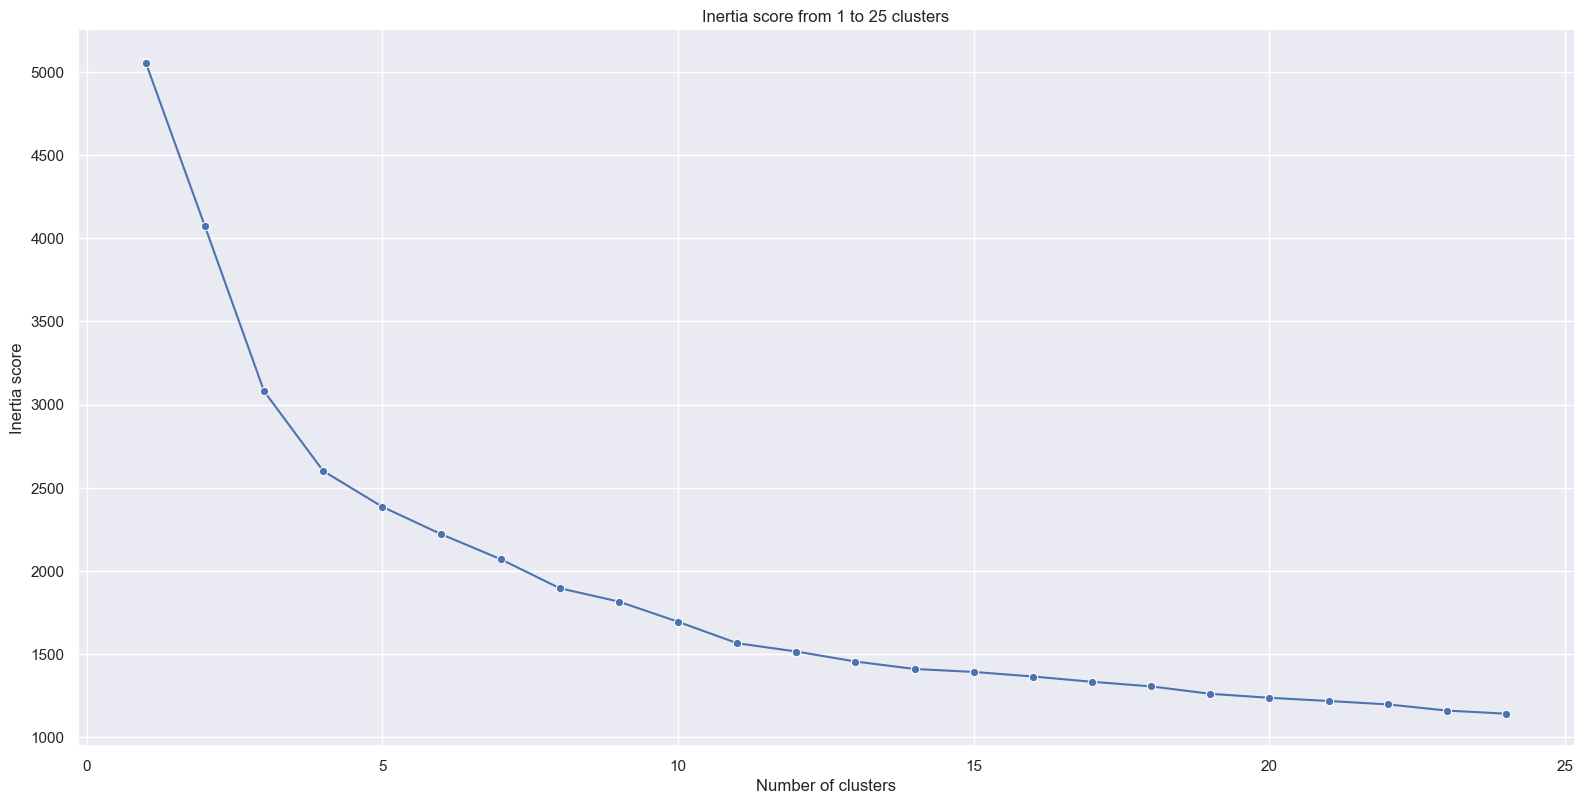

In [134]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [135]:
# Set the maximum number of clusters to try
max_k = 25

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=j,
                    n_init="auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(scaled_features_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(scaled_features_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

c:\Users\sonia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



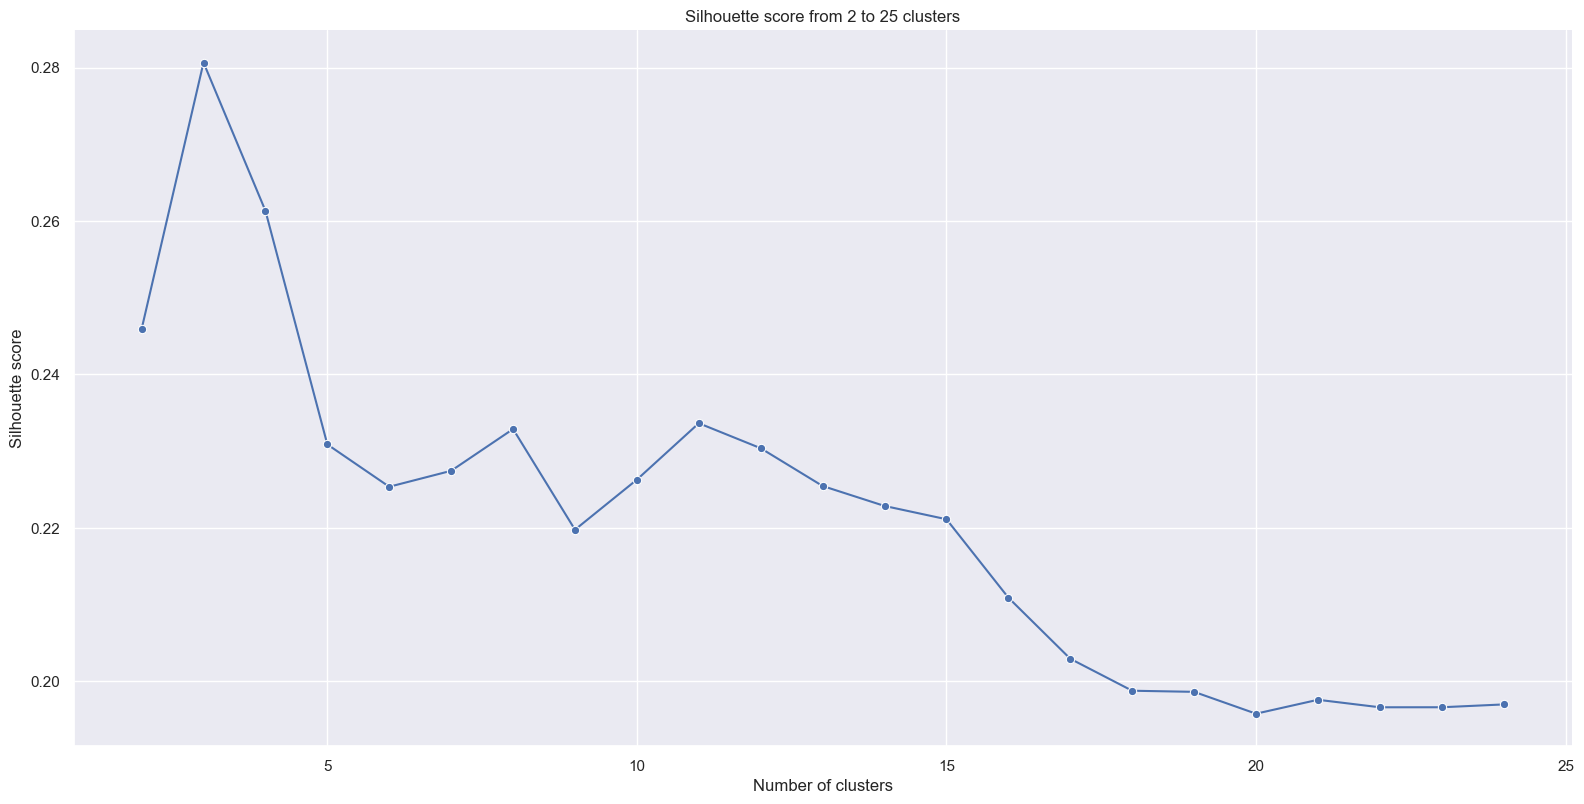

In [136]:
sns.set_theme(style='darkgrid')

(
sns.relplot(y=sil_scores,
            x=range(2,max_k),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from 2 to {max_k} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

from sklearn import set_config
set_config(transform_output="pandas")

In [191]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 25, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to a new DataFrame
clusters_df = pd.DataFrame(index=songs_df_clean_numeric.index,
                           data={"Base model": clusters})

clusters_df

,,,Base model
name,artist,id,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,20
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,22
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,2
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,24
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,23
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,10
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,10
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,10


In [194]:

# Initialise the model
my_kmeans_4 = KMeans(n_clusters= 25, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_songs_df_cl4)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to a new DataFrame
clusters_df4 = pd.DataFrame(index=songs_df_clean_numeric4.index,
                           data={"Base model_4": clusters})

clusters_df4

,,,Base model_4
name,artist,id,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,22
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,18
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,12
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,6
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,9
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,2


In [184]:
# Initialise the model
my_kmeans_2 = KMeans(n_clusters= 25, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans_2.fit(scaled_songs_df_cl4)

# Obtain the cluster output
clusters = my_kmeans_2.labels_

# Attach the cluster output to a new DataFrame
clusters_df4 = pd.DataFrame(index=songs_df_clean_numeric4.index,
                           data={"Base model_4": clusters})

clusters_df4

,,,Base model_4
name,artist,id,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,18
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,5
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,19
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,12
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,17
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,2


In [195]:
# Concatenate the two DataFrames along the columns axis
comparison_df = pd.concat([clusters_df, clusters_df4], axis=1)

# Display the concatenated DataFrame
comparison_df

,,,Base model,Base model_4
name,artist,id,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,20,22
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,22,18
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,2,12
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,24,6
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,23,9
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,10,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,10,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,10,2


In [196]:
comparison_df['Base_comp.'] = comparison_df['Base model'] == comparison_df['Base model_4']

In [197]:
base_model_similar_count = comparison_df['Base_comp.'].sum()

In [198]:
print("Similar values in Base model columns:", base_model_similar_count)

Similar values in Base model columns: 314


In [199]:
comparison_df.shape[0]

5235

In [ ]:
# clusters_combined["identical_x"] = ["1" for x: clusters_combined["Base model_x"] == clusters_combined["Base model_y"]]
comparison_df['Base_comp.'] = comparison_df['Base model'] == comparison_df['Base model_4']
comparison_df['Base_comp_2'] = comparison_df['Base_model'] == comparison_df['Base_smallest']
comparison_df['PCA95_comp.'] = comparison_df['PCA95'] == comparison_df['PCA95_small']
comparison_df['PCA95_comp_2'] = comparison_df['PCA95'] == comparison_df['PCA95_smallest']



In [ ]:
# QUESTION: Does it make sense to create base clusters for every sample?
# Which values of PCA and baseline should I compare?

base_model_similar_count = clusters_combined['Base_comp.'].sum()
base_model_similar_count_2 = clusters_combined['Base_comp_2'].sum()
pca_similar_count = clusters_combined['PCA95_comp.'].sum()
pca_similar_count_2 = clusters_combined['PCA95_comp_2'].sum()

In [169]:
value_counts_df1 = clusters_df['Base model'].value_counts()
value_counts_df1

Base model
1    1990
2    1582
0     845
3     818
Name: count, dtype: int64

In [170]:
value_counts_df2 = clusters_df4['Base model'].value_counts()
value_counts_df2

Base model
1    1916
0    1717
2     815
3     787
Name: count, dtype: int64

In [168]:
# Get the value counts for the 'Base model' column in both DataFrames
value_counts_df1 = clusters_df['Base model'].value_counts()
value_counts_df2 = clusters_df4['Base model'].value_counts()

# Find the common index values (cluster labels)
common_clusters = value_counts_df1.index.intersection(value_counts_df2.index)

# Sum the counts for the common clusters
overlap_count = sum(value_counts_df1.loc[common_clusters])

# Print the overlap count
print("Overlap between the two 'Base model' columns:", overlap_count)

Overlap between the two 'Base model' columns: 5235


In [173]:
# Get the value counts for the 'Base model' column in both DataFrames
value_counts_df1 = clusters_df['Base model'].value_counts()
value_counts_df2 = clusters_df4['Base model'].value_counts()

# Find the common cluster labels
common_clusters = set(value_counts_df1.index).intersection(value_counts_df2.index)

# Calculate the total number of entries in the 'Base model' column of the first DataFrame
total_entries_df1 = value_counts_df1.sum()

# Calculate the total number of overlapping entries
overlap_count = sum(min(value_counts_df1.get(cluster, 0), value_counts_df2.get(cluster, 0)) for cluster in common_clusters)

# Calculate the percentage overlap
overlap_percentage = (overlap_count / total_entries_df1) * 100

# Print the overlap percentage
print("Percentage overlap between the two 'Base model' columns:", overlap_percentage, "%")

Percentage overlap between the two 'Base model' columns: 83.34288443170965 %


In [127]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_features_df4)

# Transform scaled_features_df based on the fit calculations
pca_basic_df4 = pca.transform(scaled_features_df4)

pca_basic_df4

,,,pca0,pca1,pca2,pca3
name,artist,id,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,0.558026,0.101365,0.199122,-0.044206
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,0.021804,0.360368,0.160426,0.189796
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,-0.046836,0.589935,-0.075570,-0.144312
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.779286,0.363230,0.140477,0.047849
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.796132,0.230500,0.126144,-0.032564
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,0.942254,-0.299941,-0.004183,0.090154
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.882687,-0.347086,0.009253,0.097852
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,1.031838,-0.394951,-0.075282,0.170333


In [68]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_features_df)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_features_df)

pca_basic_df

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
name,artist,id,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,-0.100645,0.757439,-0.503761,0.438662,-0.258216,0.556324,0.558088,0.197859,0.102465,-0.012689,-0.006453,-0.006012
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,-0.012252,-0.452787,-0.384607,-0.225554,0.082724,-0.174384,0.039644,0.110062,0.174855,-0.017066,0.015282,-0.011870
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,-0.120967,-0.504916,-0.471857,-0.230479,0.276825,-0.008037,0.037580,-0.139682,-0.166510,0.288904,0.070339,-0.010317
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.508629,-0.178685,-0.811227,-0.006943,-0.075820,0.107766,0.222231,0.102035,0.087989,0.008886,0.013013,-0.020761
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.545635,-0.125838,-0.743892,0.172992,-0.152784,-0.082173,0.007769,0.093420,-0.024919,-0.004560,0.062146,0.002428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,1.178049,0.126037,-0.122745,-0.106026,-0.118703,-0.080266,-0.000578,-0.069255,0.084965,0.019652,0.010180,0.174408
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.975216,0.079319,-0.210300,0.173425,-0.308041,-0.098156,-0.026431,-0.106303,0.107554,0.012613,0.010267,0.138241
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,1.391258,0.338100,0.020962,0.424627,0.003921,-0.091956,-0.006531,-0.142896,0.231163,0.057287,0.251875,-0.039399


In [69]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.28132086, 0.26369579, 0.18484269, 0.11528075, 0.06126374,
       0.02787513, 0.02282004, 0.01792978, 0.0150004 , 0.00608454,
       0.00254038, 0.00134591])

c:\Users\sonia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



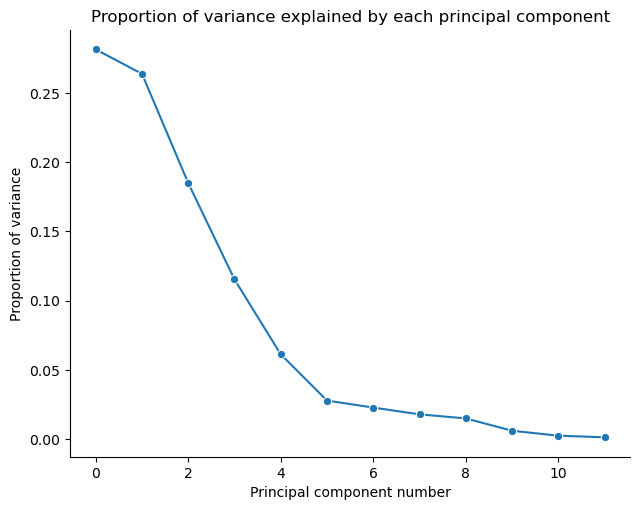

In [70]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

# Add a column for the principal component index
explained_variance_array_df["Principal component index"] = range(len(explained_variance_array))

(
# Create a line chart with sns.relplot
sns.relplot(
    kind='line',
    data=explained_variance_array_df,
    x="Principal component index",
    y="Variance explained",
    marker='o',
    aspect=1.3)
# Set the title of the plot
.set(title="Proportion of variance explained by each principal component")
# Set the axis labels
.set_axis_labels("Principal component number", "Proportion of variance")
);

In [71]:
# Set the variable elbow to where you believe the elbow is
elbow = 9

In [72]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components=elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
name,artist,id,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,-0.100645,0.757439,-0.503761,0.438662,-0.258216,0.556324,0.558088,0.197859,0.102465,-0.012689
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,-0.012252,-0.452787,-0.384607,-0.225554,0.082724,-0.174384,0.039644,0.110062,0.174855,-0.017066
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,-0.120967,-0.504916,-0.471857,-0.230479,0.276825,-0.008037,0.037580,-0.139682,-0.166510,0.288904
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.508629,-0.178685,-0.811227,-0.006943,-0.075820,0.107766,0.222231,0.102035,0.087989,0.008886
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.545635,-0.125838,-0.743892,0.172992,-0.152784,-0.082173,0.007769,0.093420,-0.024919,-0.004560
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,1.178049,0.126037,-0.122745,-0.106026,-0.118703,-0.080266,-0.000578,-0.069255,0.084965,0.019652
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.975216,0.079319,-0.210300,0.173425,-0.308041,-0.098156,-0.026431,-0.106303,0.107554,0.012613
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,1.391258,0.338100,0.020962,0.424627,0.003921,-0.091956,-0.006531,-0.142896,0.231163,0.057287


In [76]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(pca_elbow_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our clusters_df DataFrame
clusters_df[f"PCA - {elbow}"] = clusters

clusters_df

,,,Base model,PCA - 9
name,artist,id,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,2,3
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,1,1
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,1,1
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,3,2
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,3,2
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,3,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,3,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,3,2


c:\Users\sonia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



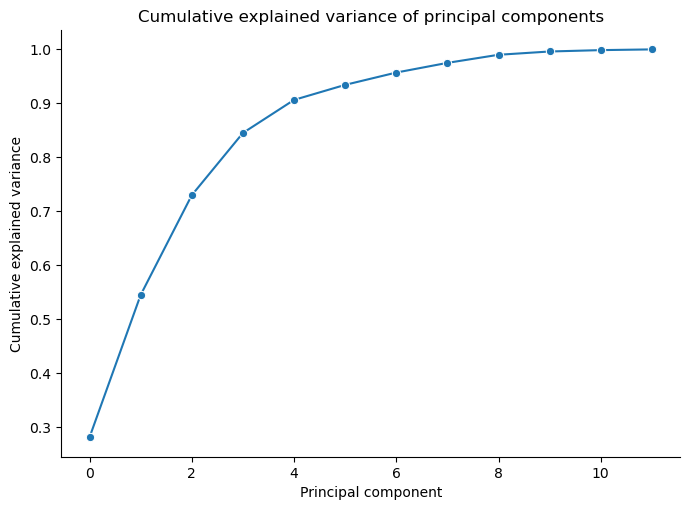

In [77]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

In [78]:
# Create a PCA object
pca_variance = PCA(n_components=0.95)

c:\Users\sonia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



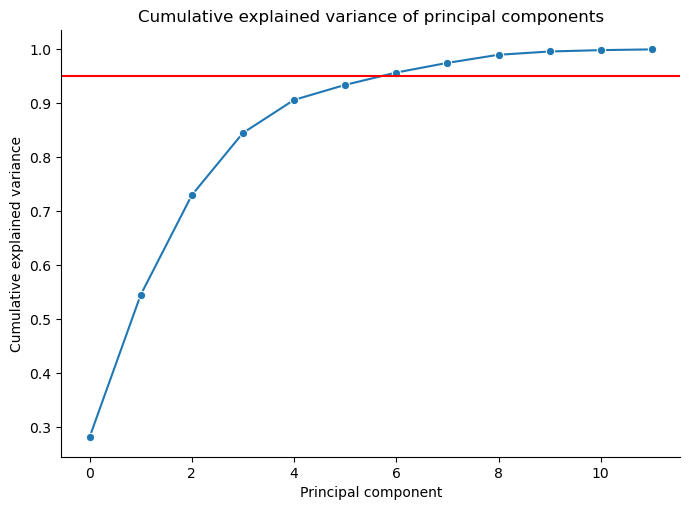

In [79]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y=0.95,
            color='red');

In [80]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,artist,id,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,-0.100645,0.757439,-0.503761,0.438662,-0.258216,0.556324,0.558088
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,-0.012252,-0.452787,-0.384607,-0.225554,0.082724,-0.174384,0.039644
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,-0.120967,-0.504916,-0.471857,-0.230479,0.276825,-0.008037,0.037580
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,0.508629,-0.178685,-0.811227,-0.006943,-0.075820,0.107766,0.222231
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,0.545635,-0.125838,-0.743892,0.172992,-0.152784,-0.082173,0.007769
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,1.178049,0.126037,-0.122745,-0.106026,-0.118703,-0.080266,-0.000578
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,0.975216,0.079319,-0.210300,0.173425,-0.308041,-0.098156,-0.026431
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,1.391258,0.338100,0.020962,0.424627,0.003921,-0.091956,-0.006531


In [93]:
# Merge cluster assignments with PCA-transformed data
pca_clusters_df = pd.concat([pca_variance_df, clusters_df], axis=1)

# Analyze cluster distribution
cluster_counts = pca_clusters_df['PCA - 0.95'].value_counts()
print(cluster_counts)

PCA - 0.95
3    1992
1    1582
0     843
2     818
Name: count, dtype: int64


In [95]:
# Choose the number of clusters (replace k with your chosen number)
k = 4

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(pca_variance_df)

# Assign cluster labels to PCA-transformed data
pca_clusters_df['Cluster'] = clusters

# Analyze cluster characteristics
cluster_means = pca_clusters_df.groupby('Cluster').mean()

# Print cluster characteristics
print(cluster_means)

# Assign meaningful names to clusters based on characteristics
# Example: Naming clusters based on high/low values of principal components
cluster_names = {}
for i, row in cluster_means.iterrows():
    # Define naming criteria based on cluster characteristics
    if row['pca1'] > 0 and row['pca2'] > 0:
        cluster_names[i] = 'High pca1 & pca2'
    elif row['pca1'] < 0 and row['pca2'] > 0:
        cluster_names[i] = 'Low pca1 & High pca2'
    elif row['pca1'] > 0 and row['pca2'] < 0:
        cluster_names[i] = 'High pca1 & Low pca2'
    else:
        cluster_names[i] = 'Low pca1 & pca2'

# Assign cluster names to clusters
pca_clusters_df['Cluster Name'] = pca_clusters_df['Cluster'].map(cluster_names)

# Print cluster names
print(pca_clusters_df['Cluster Name'].unique())

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



             pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
Cluster                                                                         
0       -0.083265 -0.435310 -0.178546  0.028474  0.012082 -0.005878  0.004242   
1       -0.450381  0.506018  0.019095 -0.049379 -0.005542  0.002504 -0.001974   
2        0.877141  0.382193 -0.220912  0.018792 -0.018752 -0.004596  0.007318   
3        0.190987 -0.292126  0.604193  0.007058  0.000026  0.013741 -0.013508   

         Base model   PCA - 9  PCA - 0.95  
Cluster                                    
0          0.996491  0.997995    2.992481  
1          2.000000  2.998104    1.000000  
2          2.997558  2.000000    2.001221  
3          0.001192  0.001192    0.003576  
['High pca1 & pca2' 'Low pca1 & pca2' 'High pca1 & Low pca2'
 'Low pca1 & High pca2']


In [87]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(pca_variance_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our clusters_df DataFrame
clusters_df["PCA - 0.95"] = clusters

clusters_df

,,,Base model,PCA - 9,PCA - 0.95
name,artist,id,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,2,3,1
Saudade De Bahia,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,1,1,3
"Canta Canta, Minha Gente",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,1,1,3
Mulher Eu Sei,Chico César,3mXqOdlLE1k67WsAxryPFs,3,2,2
Rosa Morena,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,3,2,2
...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,3,2,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,3,2,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,3,2,2


In [83]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

7


In [103]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette = silhouette_score(pca_variance_df, clusters)
davies_bouldin = davies_bouldin_score(pca_variance_df, clusters)
print("Silhouette Score:", silhouette)
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.008999169071995999
Davies–Bouldin Index: 4.483075188431775


In [105]:

cf.plot_radar_chart_clusters(pca_variance_df,"MinMaxScaler",5,42)

c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [97]:
def calculate_feature_contributions(songs_scaled_df):

    # Initialize PCA and fit it to the scaled data
    pca = PCA()
    pca.fit(songs_scaled_df)
    
    columns = songs_scaled_df.columns.to_list()
    summed_loadings = {feature: 0 for feature in columns}
    
    for i in range(10):
        absolute_loadings = np.abs(pca.components_[i])
        for j, feature in enumerate(columns):
            summed_loadings[feature] += absolute_loadings[j]
    
    # Convert summed_loadings to a DataFrame, sort, and rename column
    summed_loadings_df = pd.DataFrame(summed_loadings, index=[0]).T
    summed_loadings_df.rename(columns={0: 'summed_loadings'}, inplace=True)
    summed_loadings_df = summed_loadings_df.sort_values(by='summed_loadings', ascending=False)
    
    return summed_loadings_df

calculate_feature_contributions(scaled_features_df)

,summed_loadings
danceability,2.686729
valence,2.588417
energy,2.465198
acousticness,2.459446
instrumentalness,2.227900
liveness,1.848180
tempo,1.734830
mode,1.623782
key,1.349215
speechiness,1.272332


In [99]:
print("Shape of principal_components:", principal_components.shape)
print("Shape of clusters:", clusters.shape)

Shape of principal_components: (5235, 9)
Shape of clusters: (5235,)


c:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



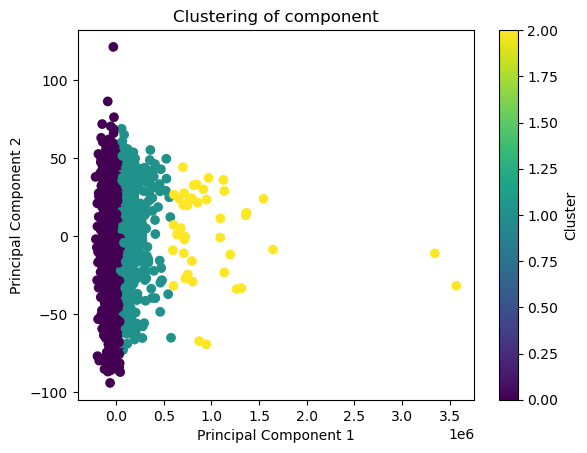

In [104]:
# Perform PCA
pca = PCA(n_components=9)  # Choose the number of components
principal_components = pca.fit_transform(songs_df_clean_numeric)  # X is your original dataset

# Cluster principal components
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
clusters = kmeans.fit_predict(principal_components)

# Visualize clusters
import matplotlib.pyplot as plt
# Convert principal_components DataFrame to a NumPy array
principal_components_array = principal_components.to_numpy()

# Plot the scatter plot using the first two principal components
plt.scatter(principal_components_array[:, 0], principal_components_array[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of component')
plt.colorbar(label='Cluster')
plt.show()